# APPLIED MACHINE LEARNING ASSIGNMENT 1

Lecturer's Name: Paul <br />
Student Name: Yap Li Xen (Kelvin) <br />
Student ID: P7414389 <br />
Class: DSAI/2021

# PART B: REGRESSION

Background
==========
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

Exploratory Data Analysis
======================
A first view of the dataset to understand the data structure and data value.

### Overview of Imported Data

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/kc_house_data.csv', sep=',')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


![](image\data_description.png)

### List DataFrame Info

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### List DataFrame Description

In [3]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Sort the most important features relative to Price

In [4]:
corr = df.corr()
corr.sort_values(["price"], ascending = False, inplace = True)
print(corr["price"])

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


### Correlation of each field to one another

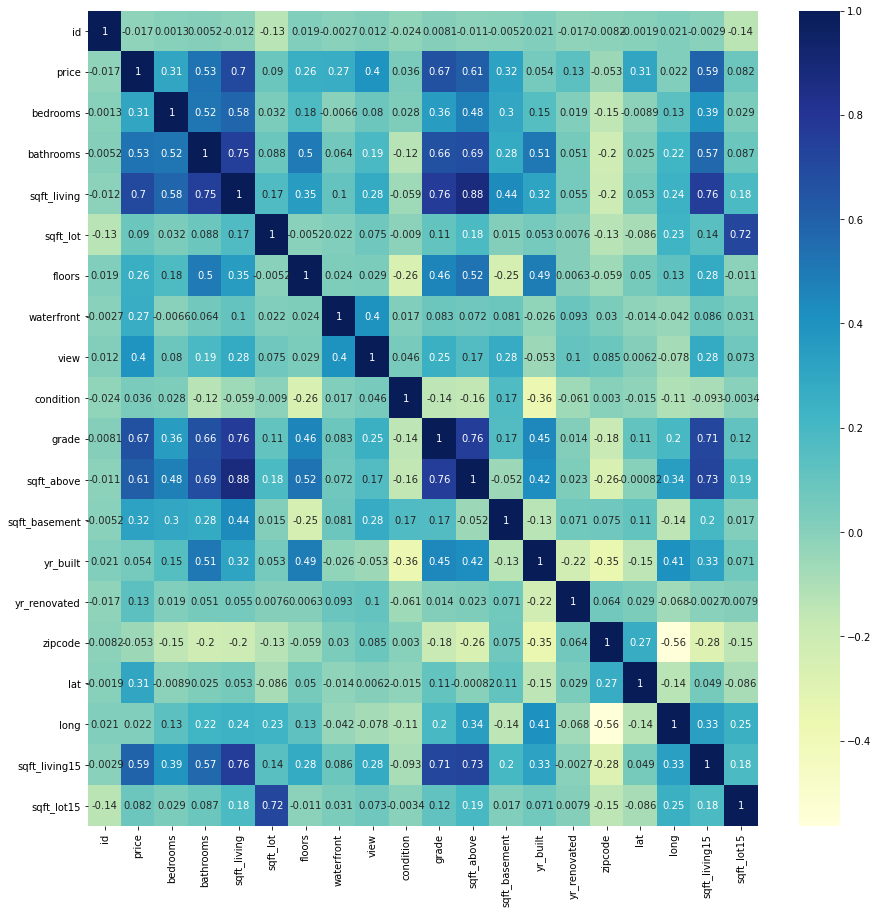

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.subplots(figsize=(15,15))
corr = df.corr()
sns.heatmap(corr, cmap="YlGnBu",annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

Data Preparation
==============

### Feature Selection
To remove features that doesn't bring impact or less important to the prediction

In [6]:
df = df.drop(['id','date','sqft_above','sqft_living15','sqft_lot15'], 1)
print(df.head())

      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  221900.0         3       1.00         1180      5650     1.0           0   
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_basement  yr_built  yr_renovated  zipcode  \
0     0          3      7              0      1955             0    98178   
1     0          3      7            400      1951          1991    98125   
2     0          3      6              0      1933             0    98028   
3     0          5      7            910      1965             0    98136   
4     0          3      8              0      1987             0    98074   

       lat     long  
0  47.5112 -122.257  
1  47.7210 -122.31

Train Model (Single Model)
======================

### Select Model
Lasso is selected as training model following the cheat-sheet in our use case

![](image/sklearn_cheatsheet.png)

### Train Test Split
Split training and test data into (80/20) and fix random state to 42

In [7]:
from sklearn.model_selection import train_test_split

df.info()
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_basement  21613 non-null  int64  
 11  yr_built       21613 non-null  int64  
 12  yr_renovated   21613 non-null  int64  
 13  zipcode        21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
dtypes: float64(5), int64(11)
memory usage: 2.6 MB


### Train Model (Lasso)

In [8]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train, y_train)

Lasso()

### Score Model

In [9]:
training_data_score = model.score(X_train, y_train)
print("Training Data Score: {:.2f}%".format(training_data_score*100))

test_data_score = model.score(X_test, y_test)
print("Test Data Score: {:.2f}%".format(test_data_score*100))

Training Data Score: 69.83%
Test Data Score: 69.99%


Evaluate Model (Single Model)
=========================
* r2_score
* mean_squared_error

In [10]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Predict Train Data
y_predict_train = model.predict(X_train)
r2_train = r2_score(y_train, y_predict_train)
mse_train = mean_squared_error(y_train, y_predict_train)

# Predict Test Data
y_predict_test = model.predict(X_test)
r2_test = r2_score(y_test, y_predict_test)
mse_test = mean_squared_error(y_test, y_predict_test)

print("R2 Score (Train Data): {:.2f}".format(r2_train))
print("R2 Score (Test Data): {:.2f}".format(r2_test))

print("MSE Score (Train Data): {:.2f}".format(mse_train))
print("MSE Score (Test Data): {:.2f}".format(mse_test))

R2 Score (Train Data): 0.70
R2 Score (Test Data): 0.70
MSE Score (Train Data): 39414224347.30
MSE Score (Test Data): 45362639291.37


Model Improvement (Single Model)
=============================

### 1. Hyperparameter Tuning
To use GridSearchCV which includes Cross Validation to identify best paramter and best score.

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001,0.01,0.1,1.0,10.0,100.0,1000.0]}
grid_search = GridSearchCV(model, param_grid=param_grid, cv=3, verbose=3, return_train_score=True)
grid_search.fit(X_train, y_train);

Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] alpha=0.001 .....................................................
[CV] ..... alpha=0.001, score=(train=0.704, test=0.687), total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ..... alpha=0.001, score=(train=0.695, test=0.704), total=   0.0s
[CV] alpha=0.001 .....................................................
[CV] ..... alpha=0.001, score=(train=0.697, test=0.699), total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ...... alpha=0.01, score=(train=0.704, test=0.687), total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ...... alpha=0.01, score=(train=0.695, test=0.704), total=   0.0s
[CV] alpha=0.01 ......................................................
[CV] ...... alpha=0.01, score=(train=0.697, test=0.699), total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ....... alph

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....... alpha=0.1, score=(train=0.695, test=0.704), total=   0.0s
[CV] alpha=0.1 .......................................................
[CV] ....... alpha=0.1, score=(train=0.697, test=0.699), total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] ....... alpha=1.0, score=(train=0.704, test=0.687), total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] ....... alpha=1.0, score=(train=0.695, test=0.704), total=   0.0s
[CV] alpha=1.0 .......................................................
[CV] ....... alpha=1.0, score=(train=0.697, test=0.699), total=   0.0s
[CV] alpha=10.0 ......................................................
[CV] ...... alpha=10.0, score=(train=0.704, test=0.687), total=   0.0s
[CV] alpha=10.0 ......................................................
[CV] ...... alpha=10.0, score=(train=0.695, test=0.704), total=   0.0s
[CV] alpha=10.0 ......................................................
[CV] .

[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.5s finished


In [12]:
print("Best Param: {}".format(grid_search.best_params_))
print("Best Score: {:.2f}%".format(grid_search.best_score_*100))

Best Param: {'alpha': 0.001}
Best Score: 69.63%


### 2. Bias-variance trade-off
To identify Appropriate-fitting

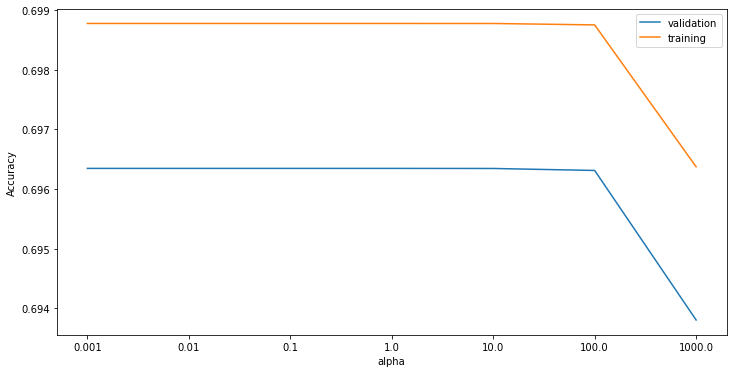

In [13]:
plt.figure(figsize=(12, 6))
validation_score = grid_search.cv_results_["mean_test_score"]
train_score = grid_search.cv_results_["mean_train_score"]
plt.plot(validation_score, label="validation")
plt.plot(train_score, label="training")
plt.xticks(np.arange(7), param_grid['alpha']); plt.xlabel("alpha"); plt.ylabel("Accuracy");plt.legend(loc='best');

Train Model (Multiple Models)
=========================
To train multiple models and compare the scores

### Assign multiple models & their corresponding param_grid into Dictionary Array

In [14]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

Dict = [
    {'model': Lasso(),
     'param_grid': {'alpha': [0.01,0.1,1.0,10.0,100.0], 'tol': [0.01,0.1,1.0,10.0,100.0], 'normalize': [True,False]}},
    {'model': Ridge(),
     'param_grid': {'alpha': [0.01,0.1,1.0,10.0,100.0], 'tol': [0.01,0.1,1.0,10.0,100.0], 'normalize': [True,False]}},
    {'model': LinearRegression(),
     'param_grid': {'fit_intercept': [True,False], 'n_jobs': [1,2,3]}},
    {'model': KNeighborsRegressor(),
     'param_grid': {'n_neighbors': [1,2,3,4,5,6,7,8,9]}},
    {'model': DecisionTreeRegressor(),
     'param_grid': {'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson', 'mse']}}
]

### Loop Dictionary and compile all scores into table

In [15]:
rows = []
for i in Dict:
    # Fit Training Data to model selected
    model = i['model']
    model.fit(X_train, y_train)
    
    # Predict Train Data
    score_train = model.score(X_train, y_train)
    y_predict_train = model.predict(X_train)
    r2_train = r2_score(y_train, y_predict_train)
    mse_train = mean_squared_error(y_train, y_predict_train)

    # Predict Test Data
    score_test = model.score(X_test, y_test)
    y_predict_test = model.predict(X_test)
    r2_test = r2_score(y_test, y_predict_test)
    mse_test = mean_squared_error(y_test, y_predict_test)

    # Perform Hyperparameter Tuning & Cross Validation
    grid_search = GridSearchCV(model, param_grid=i['param_grid'], cv=5, verbose=3, return_train_score=True)
    grid_search.fit(X_train, y_train);
    
    rows.append([model,
                 "{:.2f}%".format(score_train*100), 
                 "{:.2f}%".format(score_test*100), 
                 "{:.2f}".format(r2_train), 
                 "{:.2f}".format(r2_test), 
                 "{:.2f}".format(mse_train),
                 "{:.2f}".format(mse_test),
                 grid_search.best_params_,
                 "{:.2f}%".format(grid_search.best_score_*100)])

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] alpha=0.01, normalize=True, tol=0.01 ............................
[CV]  alpha=0.01, normalize=True, tol=0.01, score=(train=0.703, test=0.681), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=0.01 ............................
[CV]  alpha=0.01, normalize=True, tol=0.01, score=(train=0.702, test=0.684), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=0.01 ............................
[CV]  alpha=0.01, normalize=True, tol=0.01, score=(train=0.695, test=0.713), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=0.01 ............................
[CV]  alpha=0.01, normalize=True, tol=0.01, score=(train=0.695, test=0.713), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=0.01 ............................
[CV]  alpha=0.01, normalize=True, tol=0.01, score=(train=0.699, test=0.695), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=0.1 .............................
[CV]  alpha=0.01, normalize=True, tol=0.1, score=(train=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  alpha=0.01, normalize=True, tol=0.1, score=(train=0.699, test=0.695), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=1.0 .............................
[CV]  alpha=0.01, normalize=True, tol=1.0, score=(train=0.650, test=0.647), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=1.0 .............................
[CV]  alpha=0.01, normalize=True, tol=1.0, score=(train=0.648, test=0.639), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=1.0 .............................
[CV]  alpha=0.01, normalize=True, tol=1.0, score=(train=0.643, test=0.651), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=1.0 .............................
[CV]  alpha=0.01, normalize=True, tol=1.0, score=(train=0.644, test=0.658), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=1.0 .............................
[CV]  alpha=0.01, normalize=True, tol=1.0, score=(train=0.647, test=0.626), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=10.0 ............................
[CV]  alpha=0.01, normalize=True, 

[CV]  alpha=0.1, normalize=True, tol=10.0, score=(train=0.513, test=0.468), total=   0.0s
[CV] alpha=0.1, normalize=True, tol=10.0 .............................
[CV]  alpha=0.1, normalize=True, tol=10.0, score=(train=0.513, test=0.529), total=   0.0s
[CV] alpha=0.1, normalize=True, tol=10.0 .............................
[CV]  alpha=0.1, normalize=True, tol=10.0, score=(train=0.513, test=0.537), total=   0.0s
[CV] alpha=0.1, normalize=True, tol=10.0 .............................
[CV]  alpha=0.1, normalize=True, tol=10.0, score=(train=0.515, test=0.485), total=   0.0s
[CV] alpha=0.1, normalize=True, tol=100.0 ............................
[CV]  alpha=0.1, normalize=True, tol=100.0, score=(train=0.519, test=0.537), total=   0.0s
[CV] alpha=0.1, normalize=True, tol=100.0 ............................
[CV]  alpha=0.1, normalize=True, tol=100.0, score=(train=0.513, test=0.468), total=   0.0s
[CV] alpha=0.1, normalize=True, tol=100.0 ............................
[CV]  alpha=0.1, normalize=True,

[CV]  alpha=1.0, normalize=False, tol=0.01, score=(train=0.695, test=0.713), total=   0.0s
[CV] alpha=1.0, normalize=False, tol=0.01 ............................
[CV]  alpha=1.0, normalize=False, tol=0.01, score=(train=0.695, test=0.713), total=   0.0s
[CV] alpha=1.0, normalize=False, tol=0.01 ............................
[CV]  alpha=1.0, normalize=False, tol=0.01, score=(train=0.699, test=0.695), total=   0.0s
[CV] alpha=1.0, normalize=False, tol=0.1 .............................
[CV]  alpha=1.0, normalize=False, tol=0.1, score=(train=0.703, test=0.681), total=   0.0s
[CV] alpha=1.0, normalize=False, tol=0.1 .............................
[CV]  alpha=1.0, normalize=False, tol=0.1, score=(train=0.702, test=0.684), total=   0.0s
[CV] alpha=1.0, normalize=False, tol=0.1 .............................
[CV]  alpha=1.0, normalize=False, tol=0.1, score=(train=0.695, test=0.713), total=   0.0s
[CV] alpha=1.0, normalize=False, tol=0.1 .............................
[CV]  alpha=1.0, normalize=Fals

[CV]  alpha=10.0, normalize=False, tol=1.0, score=(train=0.648, test=0.639), total=   0.0s
[CV] alpha=10.0, normalize=False, tol=1.0 ............................
[CV]  alpha=10.0, normalize=False, tol=1.0, score=(train=0.643, test=0.651), total=   0.0s
[CV] alpha=10.0, normalize=False, tol=1.0 ............................
[CV]  alpha=10.0, normalize=False, tol=1.0, score=(train=0.644, test=0.658), total=   0.0s
[CV] alpha=10.0, normalize=False, tol=1.0 ............................
[CV]  alpha=10.0, normalize=False, tol=1.0, score=(train=0.647, test=0.626), total=   0.0s
[CV] alpha=10.0, normalize=False, tol=10.0 ...........................
[CV]  alpha=10.0, normalize=False, tol=10.0, score=(train=0.519, test=0.537), total=   0.0s
[CV] alpha=10.0, normalize=False, tol=10.0 ...........................
[CV]  alpha=10.0, normalize=False, tol=10.0, score=(train=0.513, test=0.468), total=   0.0s
[CV] alpha=10.0, normalize=False, tol=10.0 ...........................
[CV]  alpha=10.0, normaliz

[CV]  alpha=100.0, normalize=False, tol=100.0, score=(train=0.513, test=0.538), total=   0.0s
[CV] alpha=100.0, normalize=False, tol=100.0 .........................
[CV]  alpha=100.0, normalize=False, tol=100.0, score=(train=0.516, test=0.485), total=   0.0s
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] alpha=0.01, normalize=True, tol=0.01 ............................
[CV]  alpha=0.01, normalize=True, tol=0.01, score=(train=0.703, test=0.680), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=0.01 ............................
[CV]  alpha=0.01, normalize=True, tol=0.01, score=(train=0.702, test=0.684), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=0.01 ............................
[CV]  alpha=0.01, normalize=True, tol=0.01, score=(train=0.695, test=0.713), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=0.01 ............................
[CV]  alpha=0.01, normalize=True, tol=0.01, score=(train=0.695, test=0.714), total=   0.0s
[CV] alpha=0.01, normalize=True

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    4.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  alpha=0.01, normalize=True, tol=1.0, score=(train=0.703, test=0.680), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=1.0 .............................
[CV]  alpha=0.01, normalize=True, tol=1.0, score=(train=0.702, test=0.684), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=1.0 .............................
[CV]  alpha=0.01, normalize=True, tol=1.0, score=(train=0.695, test=0.713), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=1.0 .............................
[CV]  alpha=0.01, normalize=True, tol=1.0, score=(train=0.695, test=0.714), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=1.0 .............................
[CV]  alpha=0.01, normalize=True, tol=1.0, score=(train=0.699, test=0.696), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=10.0 ............................
[CV]  alpha=0.01, normalize=True, tol=10.0, score=(train=0.703, test=0.680), total=   0.0s
[CV] alpha=0.01, normalize=True, tol=10.0 ............................
[CV]  alpha=0.01, normalize=True,

[CV]  alpha=0.1, normalize=True, tol=10.0, score=(train=0.693, test=0.697), total=   0.0s
[CV] alpha=0.1, normalize=True, tol=100.0 ............................
[CV]  alpha=0.1, normalize=True, tol=100.0, score=(train=0.698, test=0.667), total=   0.0s
[CV] alpha=0.1, normalize=True, tol=100.0 ............................
[CV]  alpha=0.1, normalize=True, tol=100.0, score=(train=0.696, test=0.682), total=   0.0s
[CV] alpha=0.1, normalize=True, tol=100.0 ............................
[CV]  alpha=0.1, normalize=True, tol=100.0, score=(train=0.689, test=0.708), total=   0.0s
[CV] alpha=0.1, normalize=True, tol=100.0 ............................
[CV]  alpha=0.1, normalize=True, tol=100.0, score=(train=0.690, test=0.710), total=   0.0s
[CV] alpha=0.1, normalize=True, tol=100.0 ............................
[CV]  alpha=0.1, normalize=True, tol=100.0, score=(train=0.693, test=0.697), total=   0.0s
[CV] alpha=0.1, normalize=False, tol=0.01 ............................
[CV]  alpha=0.1, normalize=Fa

[CV]  alpha=1.0, normalize=False, tol=0.01, score=(train=0.695, test=0.713), total=   0.0s
[CV] alpha=1.0, normalize=False, tol=0.01 ............................
[CV]  alpha=1.0, normalize=False, tol=0.01, score=(train=0.695, test=0.713), total=   0.0s
[CV] alpha=1.0, normalize=False, tol=0.01 ............................
[CV]  alpha=1.0, normalize=False, tol=0.01, score=(train=0.699, test=0.695), total=   0.0s
[CV] alpha=1.0, normalize=False, tol=0.1 .............................
[CV]  alpha=1.0, normalize=False, tol=0.1, score=(train=0.703, test=0.681), total=   0.0s
[CV] alpha=1.0, normalize=False, tol=0.1 .............................
[CV]  alpha=1.0, normalize=False, tol=0.1, score=(train=0.702, test=0.684), total=   0.0s
[CV] alpha=1.0, normalize=False, tol=0.1 .............................
[CV]  alpha=1.0, normalize=False, tol=0.1, score=(train=0.695, test=0.713), total=   0.0s
[CV] alpha=1.0, normalize=False, tol=0.1 .............................
[CV]  alpha=1.0, normalize=Fals

[CV]  alpha=10.0, normalize=False, tol=1.0, score=(train=0.694, test=0.713), total=   0.0s
[CV] alpha=10.0, normalize=False, tol=1.0 ............................
[CV]  alpha=10.0, normalize=False, tol=1.0, score=(train=0.695, test=0.713), total=   0.0s
[CV] alpha=10.0, normalize=False, tol=1.0 ............................
[CV]  alpha=10.0, normalize=False, tol=1.0, score=(train=0.698, test=0.695), total=   0.0s
[CV] alpha=10.0, normalize=False, tol=10.0 ...........................
[CV]  alpha=10.0, normalize=False, tol=10.0, score=(train=0.703, test=0.680), total=   0.0s
[CV] alpha=10.0, normalize=False, tol=10.0 ...........................
[CV]  alpha=10.0, normalize=False, tol=10.0, score=(train=0.701, test=0.685), total=   0.0s
[CV] alpha=10.0, normalize=False, tol=10.0 ...........................
[CV]  alpha=10.0, normalize=False, tol=10.0, score=(train=0.694, test=0.713), total=   0.0s
[CV] alpha=10.0, normalize=False, tol=10.0 ...........................
[CV]  alpha=10.0, normali

[CV]  alpha=100.0, normalize=False, tol=10.0, score=(train=0.690, test=0.688), total=   0.0s
[CV] alpha=100.0, normalize=False, tol=100.0 .........................
[CV]  alpha=100.0, normalize=False, tol=100.0, score=(train=0.694, test=0.669), total=   0.0s
[CV] alpha=100.0, normalize=False, tol=100.0 .........................
[CV]  alpha=100.0, normalize=False, tol=100.0, score=(train=0.692, test=0.678), total=   0.0s
[CV] alpha=100.0, normalize=False, tol=100.0 .........................
[CV]  alpha=100.0, normalize=False, tol=100.0, score=(train=0.686, test=0.704), total=   0.0s
[CV] alpha=100.0, normalize=False, tol=100.0 .........................
[CV]  alpha=100.0, normalize=False, tol=100.0, score=(train=0.686, test=0.704), total=   0.0s
[CV] alpha=100.0, normalize=False, tol=100.0 .........................
[CV]  alpha=100.0, normalize=False, tol=100.0, score=(train=0.690, test=0.688), total=   0.0s
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] fit_intercept=Tru

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  fit_intercept=True, n_jobs=2, score=(train=0.695, test=0.713), total=   0.0s
[CV] fit_intercept=True, n_jobs=2 ....................................
[CV]  fit_intercept=True, n_jobs=2, score=(train=0.695, test=0.713), total=   0.0s
[CV] fit_intercept=True, n_jobs=2 ....................................
[CV]  fit_intercept=True, n_jobs=2, score=(train=0.699, test=0.695), total=   0.0s
[CV] fit_intercept=True, n_jobs=3 ....................................
[CV]  fit_intercept=True, n_jobs=3, score=(train=0.703, test=0.681), total=   0.0s
[CV] fit_intercept=True, n_jobs=3 ....................................
[CV]  fit_intercept=True, n_jobs=3, score=(train=0.702, test=0.684), total=   0.0s
[CV] fit_intercept=True, n_jobs=3 ....................................
[CV]  fit_intercept=True, n_jobs=3, score=(train=0.695, test=0.713), total=   0.0s
[CV] fit_intercept=True, n_jobs=3 ....................................
[CV]  fit_intercept=True, n_jobs=3, score=(train=0.695, test=0.713), total= 

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] n_neighbors=1 ...................................................
[CV] ... n_neighbors=1, score=(train=0.999, test=0.191), total=   0.1s
[CV] n_neighbors=1 ...................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ... n_neighbors=1, score=(train=0.999, test=0.289), total=   0.1s
[CV] n_neighbors=1 ...................................................
[CV] ... n_neighbors=1, score=(train=0.999, test=0.237), total=   0.1s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s



[CV] n_neighbors=1 ...................................................
[CV] ... n_neighbors=1, score=(train=0.999, test=0.236), total=   0.1s
[CV] n_neighbors=1 ...................................................
[CV] ... n_neighbors=1, score=(train=0.999, test=0.197), total=   0.1s
[CV] n_neighbors=2 ...................................................
[CV] ... n_neighbors=2, score=(train=0.809, test=0.358), total=   0.1s
[CV] n_neighbors=2 ...................................................
[CV] ... n_neighbors=2, score=(train=0.810, test=0.419), total=   0.1s
[CV] n_neighbors=2 ...................................................
[CV] ... n_neighbors=2, score=(train=0.808, test=0.404), total=   0.1s
[CV] n_neighbors=2 ...................................................
[CV] ... n_neighbors=2, score=(train=0.806, test=0.439), total=   0.1s
[CV] n_neighbors=2 ...................................................
[CV] ... n_neighbors=2, score=(train=0.810, test=0.370), total=   0.1s
[CV] 

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:   12.5s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] criterion=squared_error .........................................
[CV]  criterion=squared_error, score=(train=nan, test=nan), total=   0.0s
[CV] criterion=squared_error .........................................
[CV]  criterion=squared_error, score=(train=nan, test=nan), total=   0.0s
[CV] criterion=squared_error .........................................
[CV]  criterion=squared_error, score=(train=nan, test=nan), total=   0.0s
[CV] criterion=squared_error .........................................
[CV]  criterion=squared_error, score=(train=nan, test=nan), total=   0.0s
[CV] criterion=squared_error .........................................
[CV]  criterion=squared_error, score=(train=nan, test=nan), total=   0.0s
[CV] criterion=friedman_mse ..........................................
[CV]  criterion=friedman_mse, score=(train=1.000, test=0.772), total=   0.1s
[CV] criterion=friedman_mse .......................................

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 336, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'squared_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\

[CV]  criterion=friedman_mse, score=(train=0.999, test=0.765), total=   0.1s
[CV] criterion=friedman_mse ..........................................
[CV]  criterion=friedman_mse, score=(train=0.999, test=0.741), total=   0.1s
[CV] criterion=friedman_mse ..........................................
[CV]  criterion=friedman_mse, score=(train=0.999, test=0.749), total=   0.1s
[CV] criterion=friedman_mse ..........................................
[CV]  criterion=friedman_mse, score=(train=0.999, test=0.672), total=   0.1s
[CV] criterion=absolute_error ........................................
[CV]  criterion=absolute_error, score=(train=nan, test=nan), total=   0.0s
[CV] criterion=absolute_error ........................................
[CV]  criterion=absolute_error, score=(train=nan, test=nan), total=   0.0s
[CV] criterion=absolute_error ........................................
[CV]  criterion=absolute_error, score=(train=nan, test=nan), total=   0.0s
[CV] criterion=absolute_error ...........

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 1242, in fit
    super().fit(
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 336, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'absolute_error'

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Deta

[CV] ... criterion=poisson, score=(train=nan, test=nan), total=   0.0s
[CV] criterion=mse ...................................................
[CV] ... criterion=mse, score=(train=1.000, test=0.781), total=   0.1s
[CV] criterion=mse ...................................................
[CV] ... criterion=mse, score=(train=0.999, test=0.751), total=   0.1s
[CV] criterion=mse ...................................................
[CV] ... criterion=mse, score=(train=0.999, test=0.740), total=   0.1s
[CV] criterion=mse ...................................................
[CV] ... criterion=mse, score=(train=0.999, test=0.745), total=   0.1s
[CV] criterion=mse ...................................................
[CV] ... criterion=mse, score=(train=0.999, test=0.713), total=   0.1s


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.3s finished


### Display Summary Table Result

In [16]:
summary_table = pd.DataFrame(rows, columns=["Algorithm", 
                                            "Score(train)", 
                                            "Score(test)", 
                                            "R2(train)", 
                                            "R2(test)", 
                                            "MSE(train)",
                                            "MSE(test)",
                                            "Best Param",
                                            "Best Score"])
print(summary_table)

                 Algorithm Score(train) Score(test) R2(train) R2(test)  \
0                  Lasso()       69.83%      69.99%      0.70     0.70   
1                  Ridge()       69.83%      69.99%      0.70     0.70   
2       LinearRegression()       69.83%      69.99%      0.70     0.70   
3    KNeighborsRegressor()       67.00%      52.47%      0.67     0.52   
4  DecisionTreeRegressor()       99.92%      70.30%      1.00     0.70   

       MSE(train)       MSE(test)  \
0  39414224347.30  45362639291.37   
1  39414481794.00  45374310858.31   
2  39414224035.32  45362119293.30   
3  43110826601.40  71860114447.18   
4    100027896.18  44897533224.01   

                                        Best Param Best Score  
0   {'alpha': 1.0, 'normalize': True, 'tol': 0.01}     69.72%  
1  {'alpha': 0.01, 'normalize': True, 'tol': 0.01}     69.73%  
2             {'fit_intercept': True, 'n_jobs': 1}     69.72%  
3                               {'n_neighbors': 9}     52.09%  
4           

# References / Appendixes

1. https://www.kaggle.com/harlfoxem/housesalesprediction
3. https://scikit-learn.org/stable/